In [31]:
#libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import silhouette_score

In [33]:
data = pd.read_csv('Mall_Customers.csv')
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
data.shape

(200, 5)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [38]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [39]:
#taking the columb
x = data.iloc[:, [3, 4]].values
# Split the data into train and test sets
X_train, X_test = train_test_split(x, test_size=0.2, random_state=42)

In [40]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [41]:
# Train the KMeans model on the training set
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X_train)

# Predict the clusters for the test set
y_pred = kmeans.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


wccs value

In [42]:
wcsss =[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(x)

  wcsss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

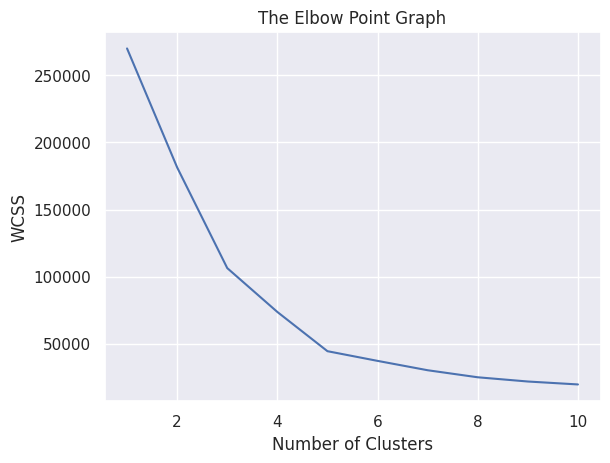

In [43]:
# plotting the elbow graph
sns.set()

plt.plot(range(1,11),wcsss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
#taning the cluster
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y=kmeans.fit_predict(x)
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


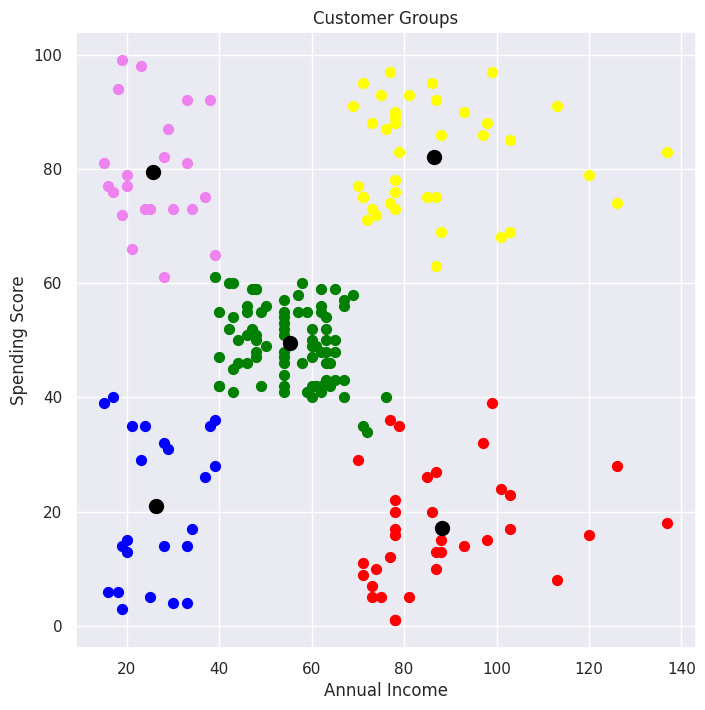

In [45]:
#visvallinzing the cluster
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='cluster1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='cluster2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='cluster3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='violet',label='cluster4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='yellow',label='cluster5')

#plot the centroid
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [46]:
# prompt: we want to take data from the outside user

# Get user input for income and spending score
income = float(input("Enter annual income: "))
spending_score = float(input("Enter spending score: "))

# Create a numpy array from user input
user_data = np.array([[income, spending_score]])

# Assuming 'kmeans' is the trained KMeans model from the preceding code
predicted_cluster = kmeans.predict(user_data)

print("Predicted Cluster:", predicted_cluster[0])


Enter annual income: 50
Enter spending score: 6
Predicted Cluster: 2


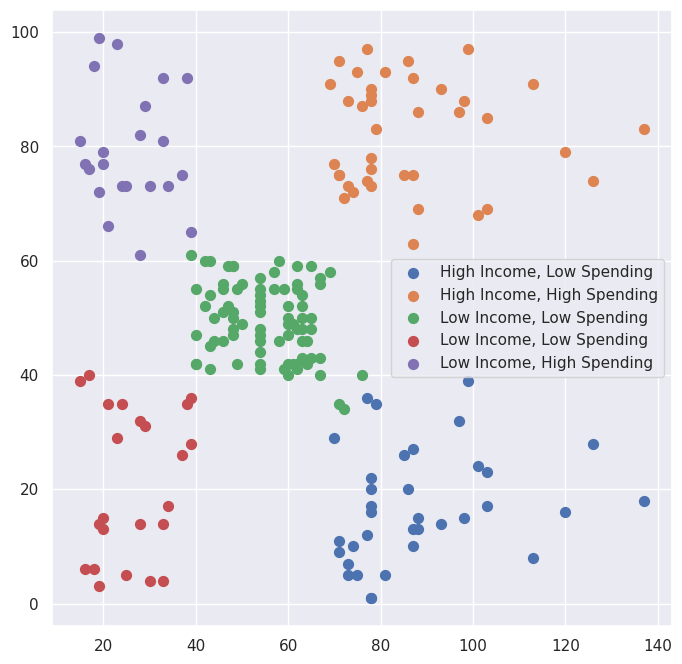

In [47]:
# prompt: we have to evaluate the cluster and re name them with high to low i income and spending score

# Evaluate clusters and rename
cluster_centers = kmeans.cluster_centers_

# Sort clusters by income (descending)
sorted_indices = np.argsort(cluster_centers[:, 0])[::-1]

# Rename clusters based on income and spending score
cluster_names = []
for i in sorted_indices:
    income_level = "High Income" if cluster_centers[i, 0] > np.median(x[:, 0]) else "Low Income"
    spending_level = "High Spending" if cluster_centers[i, 1] > np.median(x[:, 1]) else "Low Spending"
    cluster_names.append(f"{income_level}, {spending_level}")

# Update cluster labels in the plot
plt.figure(figsize=(8,8))
for i, name in enumerate(cluster_names):
    plt.scatter(x[y==sorted_indices[i],0], x[y==sorted_indices[i],1], s=50, label=name)

plt.legend()
plt.show()


Enter annual income: 50
Enter spending score: 2
Predicted Cluster: Low Income, Low Spending


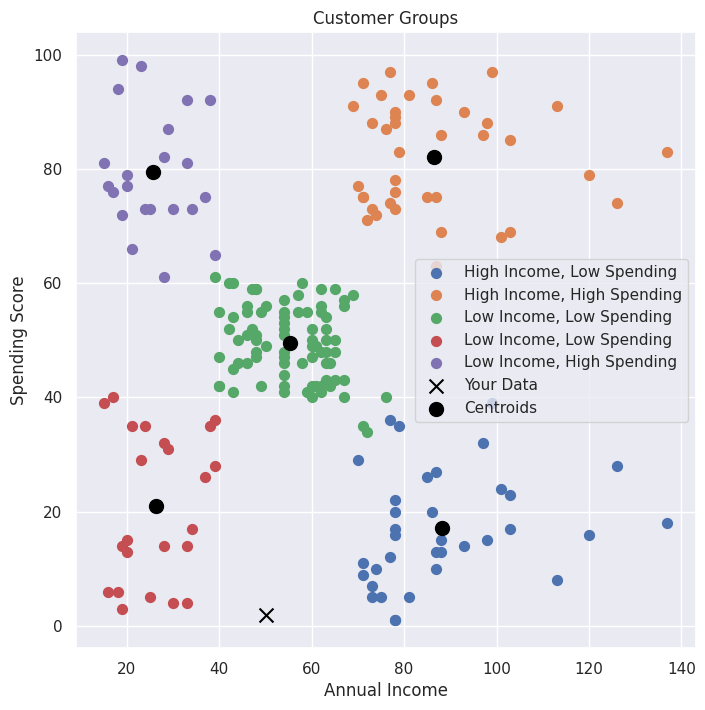

In [48]:
# prompt: we have to take data from outside user and when the user will put data like annual income and spending score we have to tell him that he lies in which cluster we also have to indicate him that he lies in which cluster in the chart


# Get user input for income and spending score
income = float(input("Enter annual income: "))
spending_score = float(input("Enter spending score: "))

# Create a numpy array from user input
user_data = np.array([[income, spending_score]])

# Predict the cluster for the user data
predicted_cluster = kmeans.predict(user_data)[0]

# Get the name of the predicted cluster
predicted_cluster_name = cluster_names[np.where(sorted_indices == predicted_cluster)[0][0]]

print("Predicted Cluster:", predicted_cluster_name)

# Visualize the clusters and the user's data point
plt.figure(figsize=(8, 8))
for i, name in enumerate(cluster_names):
    plt.scatter(x[y == sorted_indices[i], 0], x[y == sorted_indices[i], 1], s=50, label=name)

# Plot the user's data point
plt.scatter(user_data[0, 0], user_data[0, 1], s=100, c='black', marker='x', label='Your Data')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
